In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_excel("Leads Generated.xlsx")
print(df.isnull().sum())

lead_id                     0
created_time                0
Ad Name                    47
Campaign Name              47
form_name                2339
platform                    0
lead_id.1                   0
graduation_degree           6
graduation_percentage       5
work_experience             7
mapped                    711
contacted                1964
lsq_lead_stage            672
lsq_lead_owner            607
lsq_source                765
dtype: int64


In [5]:
import pandas as pd


df1 = df.loc[:, ~df.columns.duplicated()]

distinct_graduation_degrees = df1['graduation_degree'].dropna().unique()

print(distinct_graduation_degrees)


['b.tech_cse' 'B.Tech CSE' 'PG' 'Others' 'UG'
 'B.Tech (Civil, ME, ECE, EEE etc.)' 'MCA' 'B.Tech IT' 'others'
 'B.Tech (Civil, EEE, Mech. , etc.)' 'b.tech_(civil,_eee,_mech._,_etc.)'
 'm.tech' 'b.tech_it' 'b.tech_(mech,_civil,_e&tc,_etc.)' 'mca' 'M.Tech'
 'b.tech/be']


In [6]:
import pandas as pd



degree_mapping = {
    'b.tech_cse': 'B.Tech CSE',
    'B.Tech CSE': 'B.Tech CSE',
    'PG': 'PG',
    'Others': 'Others',
    'UG': 'UG',
    'B.Tech (Civil, ME, ECE, EEE etc.)': 'B.Tech (Civil, ME, ECE, EEE etc.)',
    'MCA': 'MCA',
    'B.Tech IT': 'B.Tech IT',
    'others': 'Others',
    'B.Tech (Civil, EEE, Mech. , etc.)': 'B.Tech (Civil, ME, ECE, EEE etc.)',
    'b.tech_(civil,_eee,_mech._,_etc.)': 'B.Tech (Civil, ME, ECE, EEE etc.)',
    'm.tech': 'M.Tech',
    'b.tech_it': 'B.Tech IT',
    'b.tech_(mech,_civil,_e&tc,_etc.)': 'B.Tech (Civil, ME, ECE, EEE etc.)',
    'mca': 'MCA',
    'M.Tech': 'M.Tech',
    'b.tech/be': 'B.Tech'
}

df['graduation_degree'] = df['graduation_degree'].map(degree_mapping)



In [7]:
import pandas as pd


df1 = df.loc[:, ~df.columns.duplicated()]

distinct_graduation_degrees = df1['graduation_degree'].dropna().unique()

print(distinct_graduation_degrees)


['B.Tech CSE' 'PG' 'Others' 'UG' 'B.Tech (Civil, ME, ECE, EEE etc.)' 'MCA'
 'B.Tech IT' 'M.Tech' 'B.Tech']


In [8]:
df=df.dropna(subset=["graduation_degree","graduation_percentage","work_experience","Ad Name","Campaign Name"])

Null value information for each column:
                       Null Count  Null Percentage
form_name                    2298         7.024086
contacted                    1961         5.994009
lsq_source                    764         2.335249
mapped                        710         2.170192
lsq_lead_stage                672         2.054041
lsq_lead_owner                607         1.855361
created_time                    0         0.000000
lead_id.1                       0         0.000000
platform                        0         0.000000
Campaign Name                   0         0.000000
Ad Name                         0         0.000000
lead_id                         0         0.000000
work_experience                 0         0.000000
graduation_degree               0         0.000000
graduation_percentage           0         0.000000


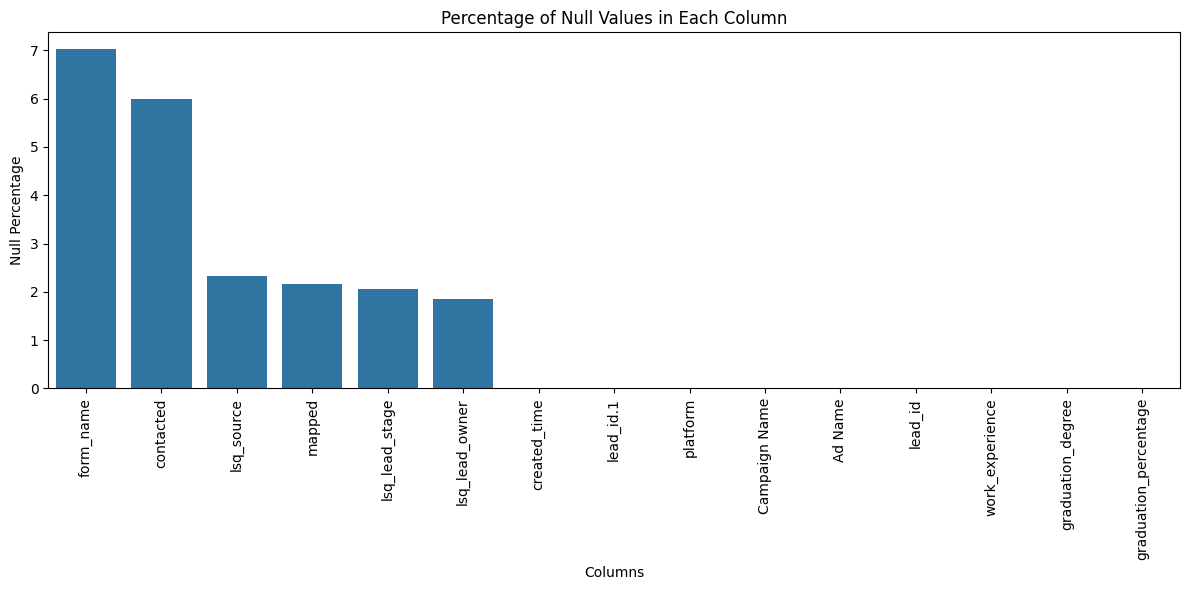

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file


null_counts = df.isnull().sum()

null_percentages = (null_counts / len(df)) * 100

null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

null_info_sorted = null_info.sort_values('Null Count', ascending=False)

print("Null value information for each column:")
print(null_info_sorted)

plt.figure(figsize=(12, 6))
sns.barplot(x=null_info_sorted.index, y='Null Percentage', data=null_info_sorted)
plt.xticks(rotation=90)
plt.title('Percentage of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Null Percentage')
plt.tight_layout()
plt.show()
plt.close()



In [10]:
import pandas as pd
from sklearn.impute import SimpleImputer

null_counts = df.isnull().sum()

columns_to_drop = null_counts[null_counts < 100].index
columns_to_impute = null_counts[null_counts >= 100].index

df_cleaned = df.dropna(subset=columns_to_drop)

for column in columns_to_impute:
    if df_cleaned[column].dtype == 'object':
        imputer = SimpleImputer(strategy='most_frequent')
    else:
        imputer = SimpleImputer(strategy='median')
    
    df_cleaned[column] = imputer.fit_transform(df_cleaned[[column]]).flatten()

print("Final null value counts after handling:")
print(df_cleaned.isnull().sum())

print(f"Rows in original dataset: {len(df)}")
print(f"Rows in cleaned dataset: {len(df_cleaned)}")
print(f"Rows removed: {len(df) - len(df_cleaned)}")

print("Columns where nulls were removed (less than 100 nulls):")
print(columns_to_drop.tolist())

print("Columns where nulls were imputed (100 or more nulls):")
print(columns_to_impute.tolist())



print("First few rows of the cleaned dataset:")
print(df_cleaned.head())


Final null value counts after handling:
lead_id                  0
created_time             0
Ad Name                  0
Campaign Name            0
form_name                0
platform                 0
lead_id.1                0
graduation_degree        0
graduation_percentage    0
work_experience          0
mapped                   0
contacted                0
lsq_lead_stage           0
lsq_lead_owner           0
lsq_source               0
dtype: int64
Rows in original dataset: 32716
Rows in cleaned dataset: 32716
Rows removed: 0
Columns where nulls were removed (less than 100 nulls):
['lead_id', 'created_time', 'Ad Name', 'Campaign Name', 'platform', 'lead_id.1', 'graduation_degree', 'graduation_percentage', 'work_experience']
Columns where nulls were imputed (100 or more nulls):
['form_name', 'mapped', 'contacted', 'lsq_lead_stage', 'lsq_lead_owner', 'lsq_source']
First few rows of the cleaned dataset:
                                lead_id        created_time  \
0                 

In [11]:
# import pandas as pd
# import re



# # Function to extract numeric value or return 0 if no numeric value is found
# def extract_numeric(value):
#     if isinstance(value, str):
#         match = re.search(r'\d+', value)
#         if match:
#             return int(match.group(0))
#     return 0

# # Apply the function to the work_experience column
# df['work_experience'] = df['work_experience'].apply(extract_numeric)

# # Display the cleaned dataframe
# df.head(20)


In [12]:
df_cleaned=df_cleaned.drop(columns=["lead_id.1"])

In [13]:
df_cleaned.head(20)


,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted,lsq_lead_stage,lsq_lead_owner,lsq_source
0,l:3587545764833355,2024-05-02 14:18:00,USP_S3_never-been-easier,USP_2_Lead-gen-1_220124,BM - US pathway Webinar Form - More Volume - N...,Facebook,B.Tech CSE,70.0,7,Mapped,Contacted,Not Interested,Janvi Aggarwal,Facebook
1,cc0da387-682c-4530-a79a-1168487410f0,2024-04-30 18:00:07,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,B.Tech CSE,80.0,3 Years,Mapped,Contacted,Not Interested,System,Facebook
2,10045c19-1c8d-4d63-a6bf-62d00a2f50ec,2024-03-21 02:25:55,Shreya,USP_Video_APTLTSKA_Lead-Gen_Keywords_050324,BM - US pathway Webinar Form - More Volume - N...,Google,PG,50.0,1 Year,Mapped,Contacted,Invalid phone number,Ankur chandra,GoogleAds
3,7e0db362-ebc3-4265-9131-d69bae5eb3f5,2024-03-17 06:40:21,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,Others,60.0,Fresher,Mapped,Contacted,Invalid phone number,Chitwan Soni,GoogleAds
4,5f74bcc1-08a8-414d-a729-69d5071b4f53,2024-03-20 07:48:39,Shreya,USP_Video_APTLTSKA_Lead-Gen_Websites_050324,BM - US pathway Webinar Form - More Volume - N...,Google,UG,100.0,10 Years,Mapped,Contacted,Invalid phone number,Ayush Dixit,GoogleAds
5,b646328e-e169-48b1-b2f0-486f2f60da20,2024-03-15 21:46:06,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,UG,50.0,Fresher,Mapped,Contacted,Invalid phone number,System,GoogleAds
6,51737b98-7011-4066-b5c3-324173374fce,2024-03-15 17:50:29,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,Others,75.0,1 Year,Mapped,Contacted,Invalid phone number,Shrey Goel,GoogleAds
7,0d2fb3f0-6bad-4c6a-9d44-b02f37d8c2c6,2024-01-26 19:47:29,--,USP_Search_India-ex-APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,Others,90.0,Fresher,Mapped,Contacted,Invalid phone number,Saket Rai,GoogleAds
8,9e9bc870-8ab6-4e6d-8128-03a3406a9648,2024-01-27 08:48:27,--,USP_Search_India-ex-APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,UG,50.0,Fresher,Mapped,Contacted,Invalid phone number,System,GoogleAds
9,5a90b8f3-c021-4253-857b-d0394861bcf4,2024-02-25 12:04:24,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,"B.Tech (Civil, ME, ECE, EEE etc.)",85.0,5 Years,Mapped,Contacted,Invalid phone number,Saket Rai,GoogleAds


In [14]:
import pandas as pd
import re

def extract_numeric(value):
    match = re.search(r'\d+', str(value))
    if match:
        return int(match.group(0))
    return 0

df_cleaned['work_experience'] = df_cleaned['work_experience'].apply(extract_numeric)

df_cleaned['work_experience'] = pd.to_numeric(df_cleaned['work_experience'])

df_cleaned.head(20)


,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted,lsq_lead_stage,lsq_lead_owner,lsq_source
0,l:3587545764833355,2024-05-02 14:18:00,USP_S3_never-been-easier,USP_2_Lead-gen-1_220124,BM - US pathway Webinar Form - More Volume - N...,Facebook,B.Tech CSE,70.0,7,Mapped,Contacted,Not Interested,Janvi Aggarwal,Facebook
1,cc0da387-682c-4530-a79a-1168487410f0,2024-04-30 18:00:07,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,B.Tech CSE,80.0,3,Mapped,Contacted,Not Interested,System,Facebook
2,10045c19-1c8d-4d63-a6bf-62d00a2f50ec,2024-03-21 02:25:55,Shreya,USP_Video_APTLTSKA_Lead-Gen_Keywords_050324,BM - US pathway Webinar Form - More Volume - N...,Google,PG,50.0,1,Mapped,Contacted,Invalid phone number,Ankur chandra,GoogleAds
3,7e0db362-ebc3-4265-9131-d69bae5eb3f5,2024-03-17 06:40:21,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,Others,60.0,0,Mapped,Contacted,Invalid phone number,Chitwan Soni,GoogleAds
4,5f74bcc1-08a8-414d-a729-69d5071b4f53,2024-03-20 07:48:39,Shreya,USP_Video_APTLTSKA_Lead-Gen_Websites_050324,BM - US pathway Webinar Form - More Volume - N...,Google,UG,100.0,10,Mapped,Contacted,Invalid phone number,Ayush Dixit,GoogleAds
5,b646328e-e169-48b1-b2f0-486f2f60da20,2024-03-15 21:46:06,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,UG,50.0,0,Mapped,Contacted,Invalid phone number,System,GoogleAds
6,51737b98-7011-4066-b5c3-324173374fce,2024-03-15 17:50:29,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,Others,75.0,1,Mapped,Contacted,Invalid phone number,Shrey Goel,GoogleAds
7,0d2fb3f0-6bad-4c6a-9d44-b02f37d8c2c6,2024-01-26 19:47:29,--,USP_Search_India-ex-APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,Others,90.0,0,Mapped,Contacted,Invalid phone number,Saket Rai,GoogleAds
8,9e9bc870-8ab6-4e6d-8128-03a3406a9648,2024-01-27 08:48:27,--,USP_Search_India-ex-APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,UG,50.0,0,Mapped,Contacted,Invalid phone number,System,GoogleAds
9,5a90b8f3-c021-4253-857b-d0394861bcf4,2024-02-25 12:04:24,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,"B.Tech (Civil, ME, ECE, EEE etc.)",85.0,5,Mapped,Contacted,Invalid phone number,Saket Rai,GoogleAds


In [15]:
df_cleaned.head(20)

,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted,lsq_lead_stage,lsq_lead_owner,lsq_source
0,l:3587545764833355,2024-05-02 14:18:00,USP_S3_never-been-easier,USP_2_Lead-gen-1_220124,BM - US pathway Webinar Form - More Volume - N...,Facebook,B.Tech CSE,70.0,7,Mapped,Contacted,Not Interested,Janvi Aggarwal,Facebook
1,cc0da387-682c-4530-a79a-1168487410f0,2024-04-30 18:00:07,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,B.Tech CSE,80.0,3,Mapped,Contacted,Not Interested,System,Facebook
2,10045c19-1c8d-4d63-a6bf-62d00a2f50ec,2024-03-21 02:25:55,Shreya,USP_Video_APTLTSKA_Lead-Gen_Keywords_050324,BM - US pathway Webinar Form - More Volume - N...,Google,PG,50.0,1,Mapped,Contacted,Invalid phone number,Ankur chandra,GoogleAds
3,7e0db362-ebc3-4265-9131-d69bae5eb3f5,2024-03-17 06:40:21,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,Others,60.0,0,Mapped,Contacted,Invalid phone number,Chitwan Soni,GoogleAds
4,5f74bcc1-08a8-414d-a729-69d5071b4f53,2024-03-20 07:48:39,Shreya,USP_Video_APTLTSKA_Lead-Gen_Websites_050324,BM - US pathway Webinar Form - More Volume - N...,Google,UG,100.0,10,Mapped,Contacted,Invalid phone number,Ayush Dixit,GoogleAds
5,b646328e-e169-48b1-b2f0-486f2f60da20,2024-03-15 21:46:06,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,UG,50.0,0,Mapped,Contacted,Invalid phone number,System,GoogleAds
6,51737b98-7011-4066-b5c3-324173374fce,2024-03-15 17:50:29,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,Others,75.0,1,Mapped,Contacted,Invalid phone number,Shrey Goel,GoogleAds
7,0d2fb3f0-6bad-4c6a-9d44-b02f37d8c2c6,2024-01-26 19:47:29,--,USP_Search_India-ex-APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,Others,90.0,0,Mapped,Contacted,Invalid phone number,Saket Rai,GoogleAds
8,9e9bc870-8ab6-4e6d-8128-03a3406a9648,2024-01-27 08:48:27,--,USP_Search_India-ex-APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,UG,50.0,0,Mapped,Contacted,Invalid phone number,System,GoogleAds
9,5a90b8f3-c021-4253-857b-d0394861bcf4,2024-02-25 12:04:24,--,USP_Search_APTNTSKA_250124,BM - US pathway Webinar Form - More Volume - N...,Google,"B.Tech (Civil, ME, ECE, EEE etc.)",85.0,5,Mapped,Contacted,Invalid phone number,Saket Rai,GoogleAds


In [16]:

df_cleaned.to_excel("cl_Leads1.xlsx",index=False)



In [17]:
df=df_cleaned
Q1=df["graduation_percentage"].quantile(0.25)
Q3=df["graduation_percentage"].quantile(0.75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
Ub=Q3+1.5*IQR
outliers=df[(df["graduation_percentage"]<lb)|df["graduation_percentage"]>Ub]
print(len(outliers))

0


In [18]:
df['Z_score']=(df["graduation_percentage"]-df["graduation_percentage"].mean())/df["graduation_percentage"].std()
outliers=df[(df['Z_score']>3 )|( df['Z_score']<-3)]
print(len(outliers))

0


In [19]:
Cat=[i for i in df.columns if df[i].dtype=="object"]
print(Cat)
Num=[i for i in df.columns if df[i].dtype!="object"]
print(Num)



['lead_id', 'Ad Name', 'Campaign Name', 'form_name', 'platform', 'graduation_degree', 'mapped', 'contacted', 'lsq_lead_stage', 'lsq_lead_owner', 'lsq_source']
['created_time', 'graduation_percentage', 'work_experience', 'Z_score']


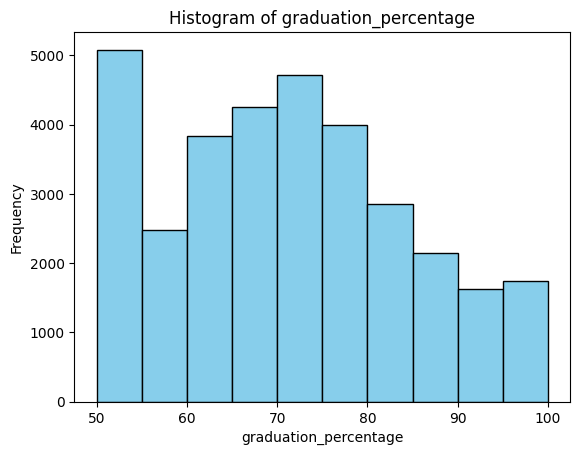

In [20]:
plt.figure()
df['graduation_percentage'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of graduation_percentage')
plt.xlabel('graduation_percentage')
plt.ylabel('Frequency')
plt.show()

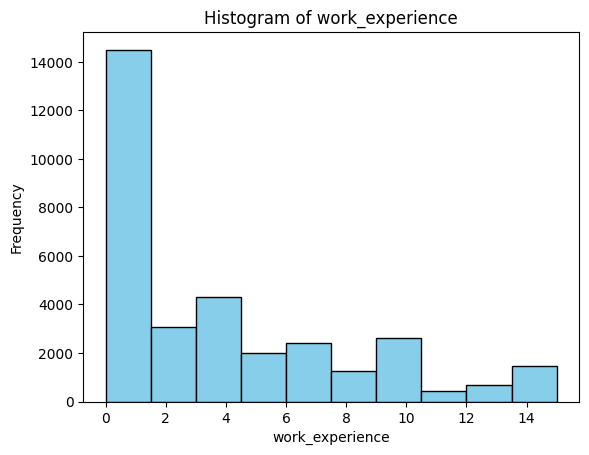

In [21]:
plt.figure()
df['work_experience'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of work_experience')
plt.xlabel('work_experience')
plt.ylabel('Frequency')
plt.show()


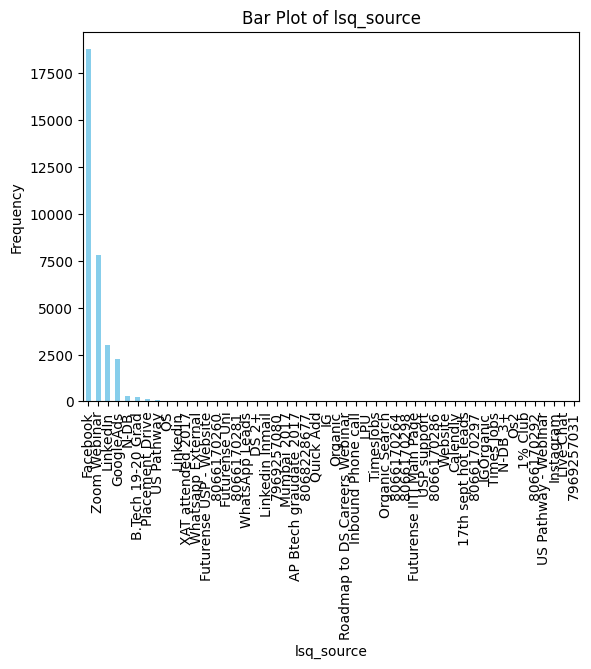

In [22]:
plt.figure()
df['lsq_source'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Plot of lsq_source')
plt.xlabel('lsq_source')
plt.ylabel('Frequency')
plt.show()

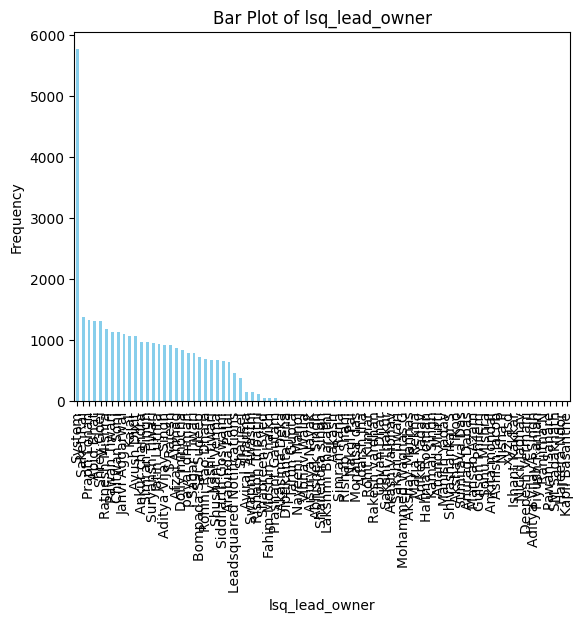

In [23]:
plt.figure()
df['lsq_lead_owner'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Plot of lsq_lead_owner')
plt.xlabel('lsq_lead_owner')
plt.ylabel('Frequency')
plt.show()

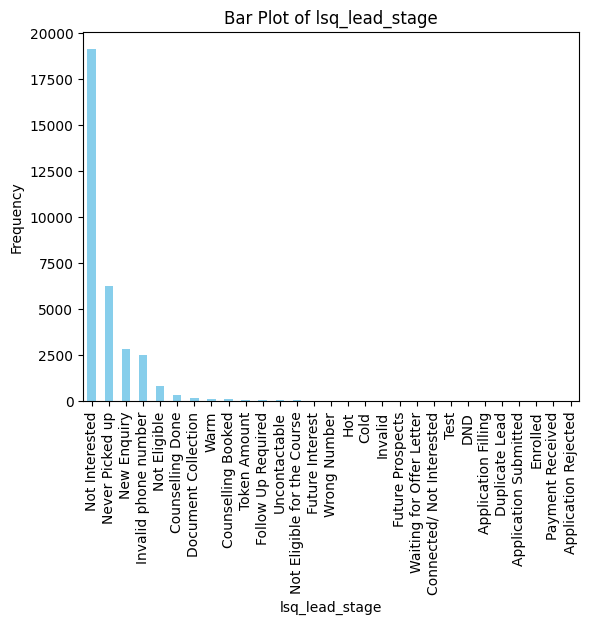

In [24]:
plt.figure()
df['lsq_lead_stage'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Plot of lsq_lead_stage')
plt.xlabel('lsq_lead_stage')
plt.ylabel('Frequency')
plt.show()

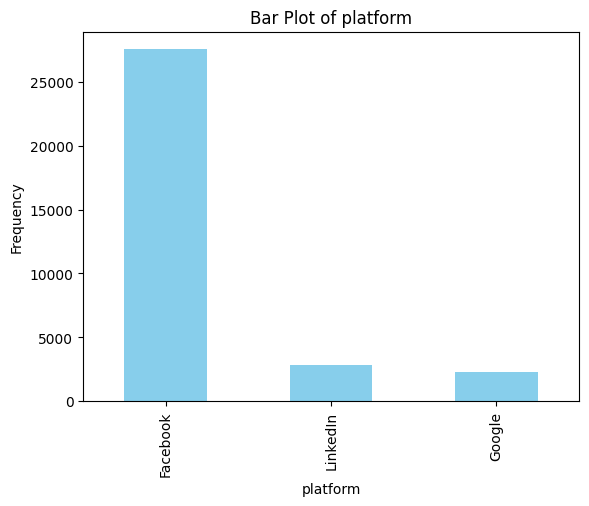

In [25]:
plt.figure()
df['platform'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Plot of platform')
plt.xlabel('platform')
plt.ylabel('Frequency')
plt.show()

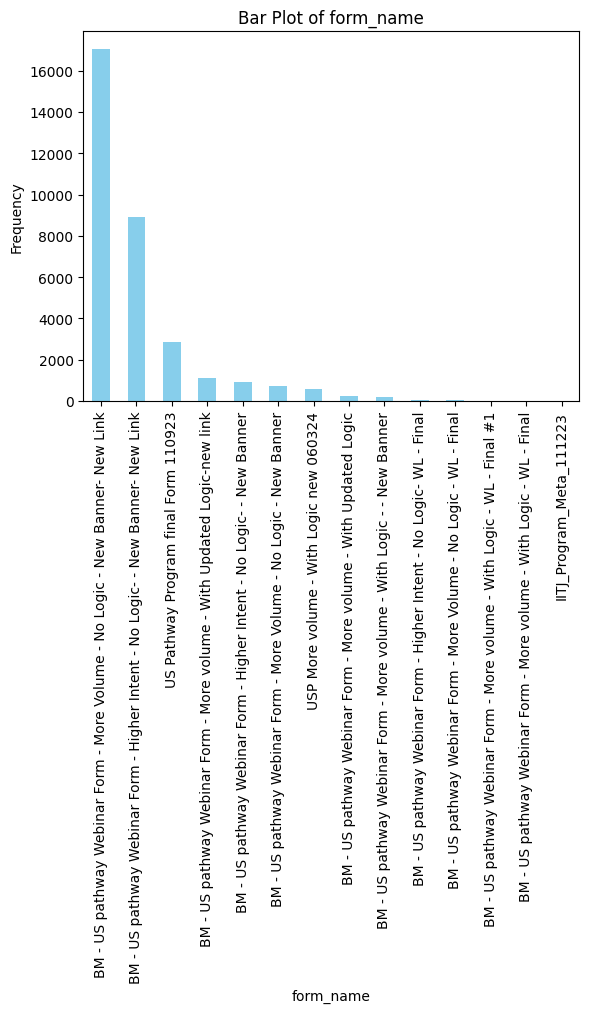

In [26]:
plt.figure()
df['form_name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Plot of form_name')
plt.xlabel('form_name')
plt.ylabel('Frequency')
plt.show()

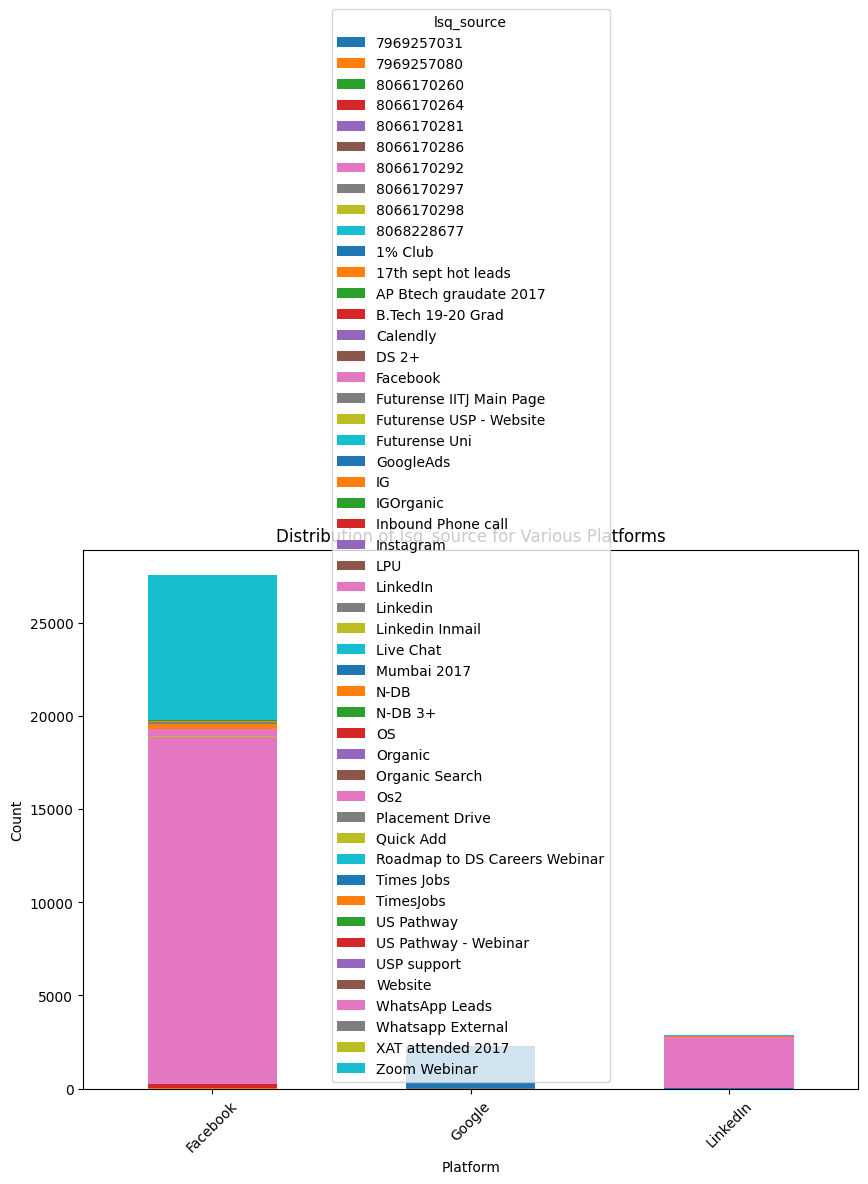

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

crosstab = pd.crosstab(df['platform'], df['lsq_source'])

crosstab.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Distribution of lsq_source for Various Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [28]:
{"arguments": "{\"python\":\"# Convert created_time to datetime if it's not already\\ndf['created_time'] = pd.to_datetime(df['created_time'])\\n\\n# Extract month and year from created_time\\ndf['month_year'] = df['created_time'].dt.to_period('M')\\n\\n# Count leads by month and platform\\nlead_counts = df.groupby(['month_year', 'platform']).size().unstack(fill_value=0)\\n\\n# Plot the trend\\nplt.figure(figsize=(12, 6))\\nlead_counts.plot(kind='line', marker='o')\\nplt.title('Trend of Leads Over Time by Platform')\\nplt.xlabel('Month')\\nplt.ylabel('Number of Leads')\\nplt.legend(title='Platform')\\nplt.xticks(rotation=45)\\nplt.tight_layout()\\nplt.show()\\n\\nprint('Trend of Leads Over Time by Platform plotted.')\\n\\n# Calculate conversion rates\\ndf['converted'] = df['lsq_lead_stage'].apply(lambda x: 1 if x == 'Converted' else 0)\\nconversion_rates = df.groupby('platform')['converted'].mean().sort_values(ascending=False)\\n\\nprint('\\nConversion Rates by Platform:')\\nprint(conversion_rates)\"}"}

{'arguments': '{"python":"# Convert created_time to datetime if it\'s not already\\ndf[\'created_time\'] = pd.to_datetime(df[\'created_time\'])\\n\\n# Extract month and year from created_time\\ndf[\'month_year\'] = df[\'created_time\'].dt.to_period(\'M\')\\n\\n# Count leads by month and platform\\nlead_counts = df.groupby([\'month_year\', \'platform\']).size().unstack(fill_value=0)\\n\\n# Plot the trend\\nplt.figure(figsize=(12, 6))\\nlead_counts.plot(kind=\'line\', marker=\'o\')\\nplt.title(\'Trend of Leads Over Time by Platform\')\\nplt.xlabel(\'Month\')\\nplt.ylabel(\'Number of Leads\')\\nplt.legend(title=\'Platform\')\\nplt.xticks(rotation=45)\\nplt.tight_layout()\\nplt.show()\\n\\nprint(\'Trend of Leads Over Time by Platform plotted.\')\\n\\n# Calculate conversion rates\\ndf[\'converted\'] = df[\'lsq_lead_stage\'].apply(lambda x: 1 if x == \'Converted\' else 0)\\nconversion_rates = df.groupby(\'platform\')[\'converted\'].mean().sort_values(ascending=False)\\n\\nprint(\'\\nConversi

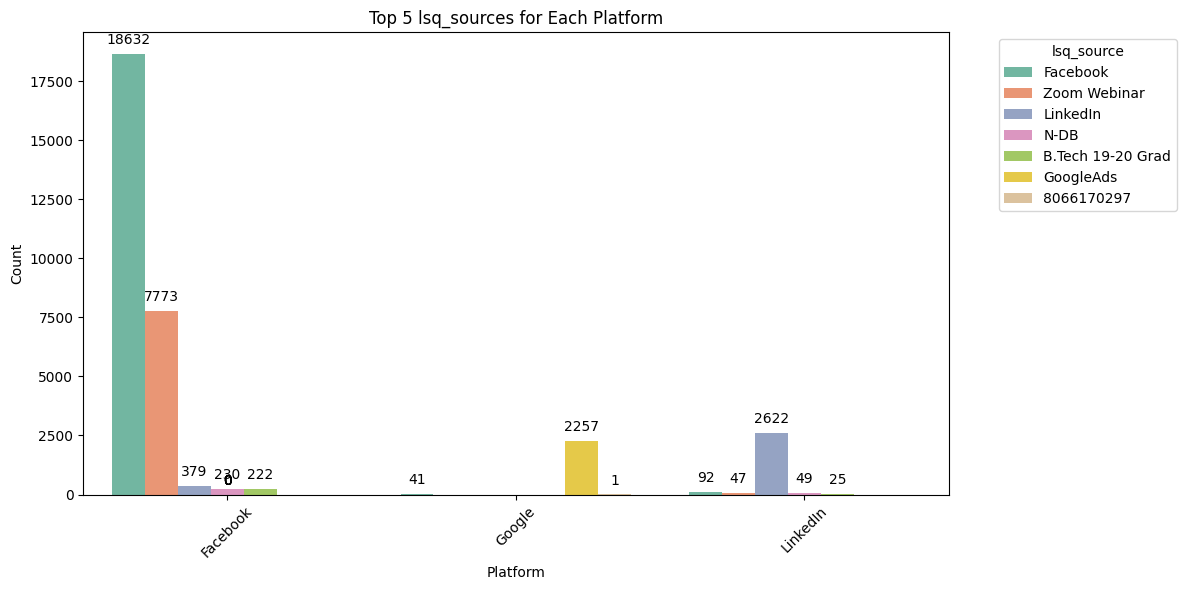

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

source_counts = df.groupby(['platform', 'lsq_source']).size().reset_index(name='count')

top_sources = source_counts.sort_values(['platform', 'count'], ascending=[True, False])
top_sources = top_sources.groupby('platform').head(5)

top_sources['lsq_source'] = top_sources['lsq_source'].astype(str)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_sources, x='platform', y='count', hue='lsq_source', palette='Set2', dodge=True)
plt.title('Top 5 lsq_sources for Each Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='lsq_source', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height): 
        bar_plot.annotate(f'{int(height)}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='bottom', 
                          fontsize=10, color='black', 
                          xytext=(0, 5),  
                          textcoords='offset points')

plt.tight_layout()  
plt.show()


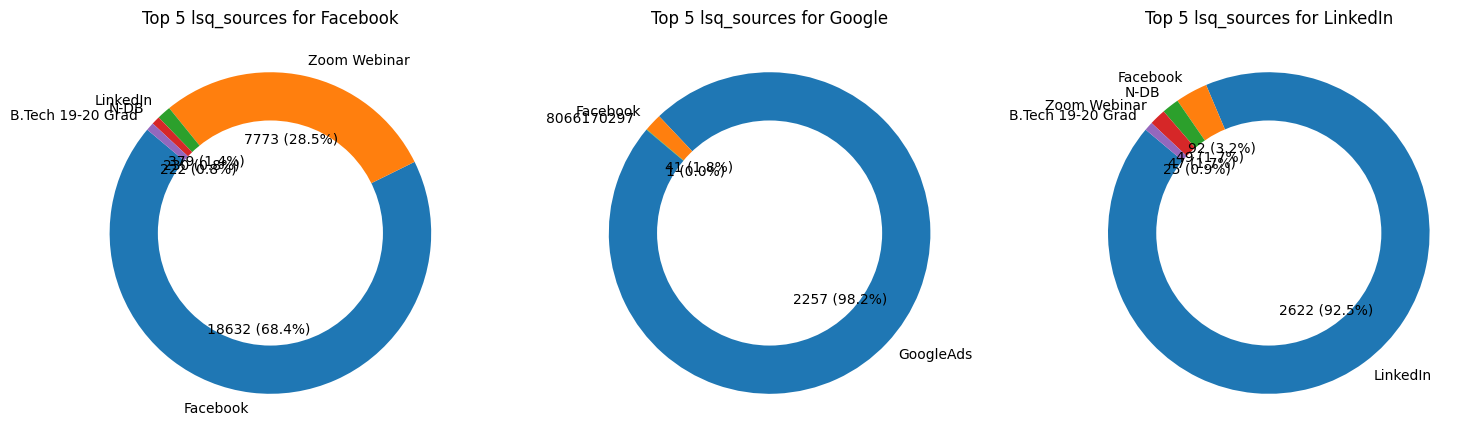

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

source_counts = df.groupby(['platform', 'lsq_source']).size().reset_index(name='count')

top_sources = source_counts.sort_values(['platform', 'count'], ascending=[True, False])
top_sources = top_sources.groupby('platform').head(5)

unique_platforms = top_sources['platform'].unique()

plt.figure(figsize=(15, 10))

for i, platform in enumerate(unique_platforms):
    plt.subplot(2, 3, i + 1)  
    platform_data = top_sources[top_sources['platform'] == platform]
    
    wedges, texts, autotexts = plt.pie(platform_data['count'], labels=platform_data['lsq_source'], autopct='', startangle=140)
    
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')  
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    for i, a in enumerate(autotexts):
        a.set_text(f'{platform_data["count"].iloc[i]} ({platform_data["count"].iloc[i] / platform_data["count"].sum() * 100:.1f}%)')
    
    plt.title(f'Top 5 lsq_sources for {platform}')

plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

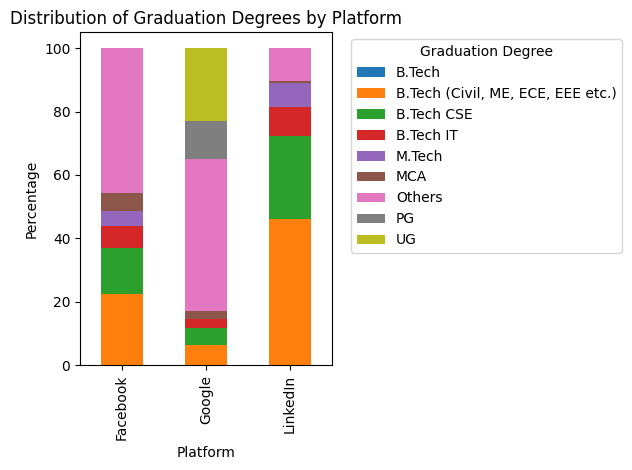

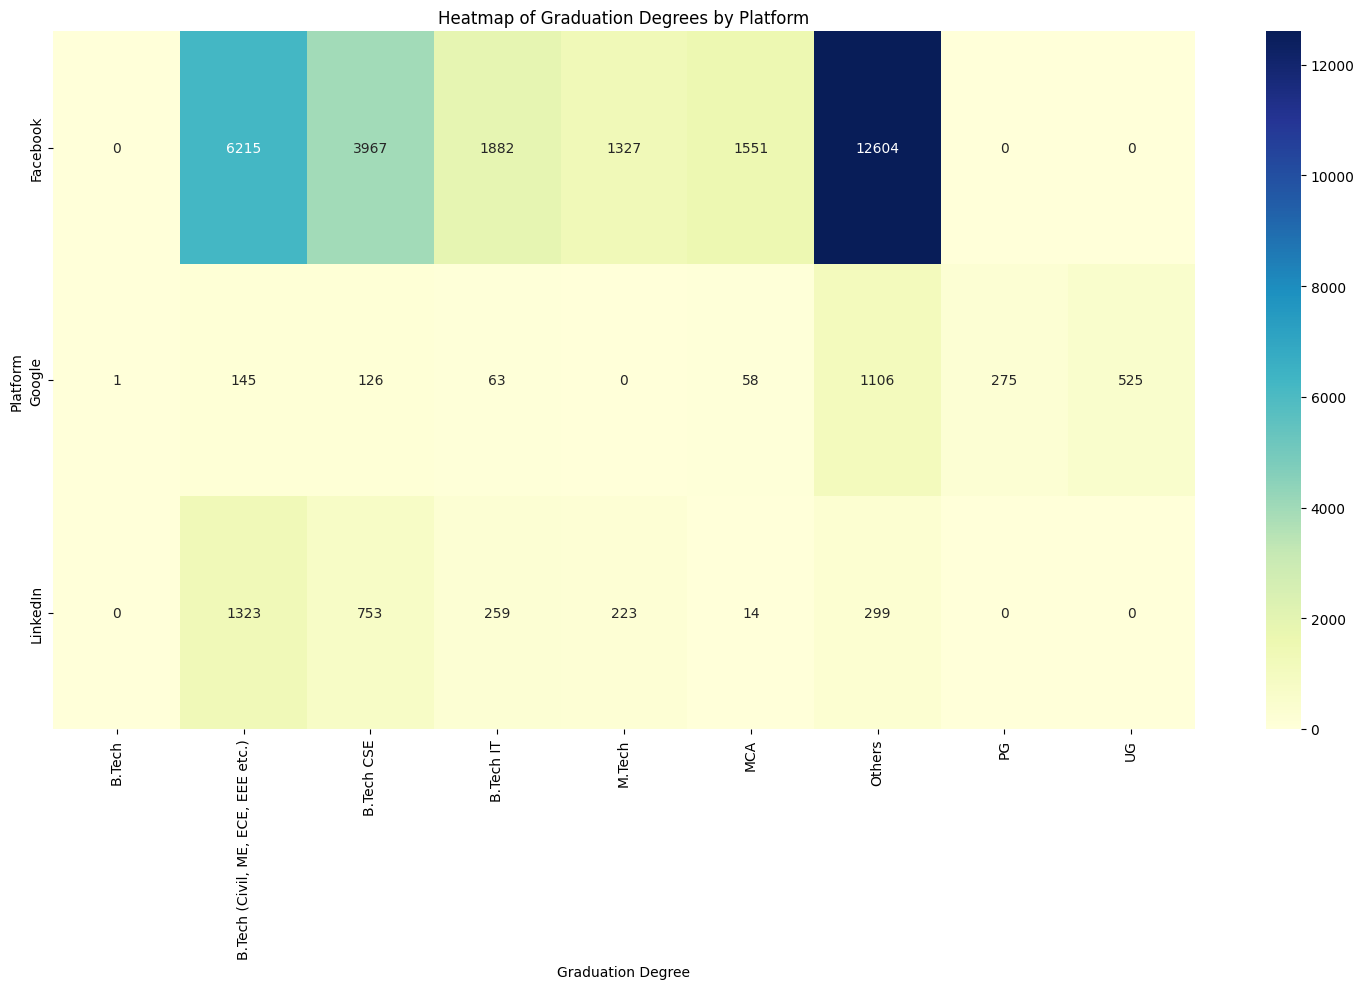

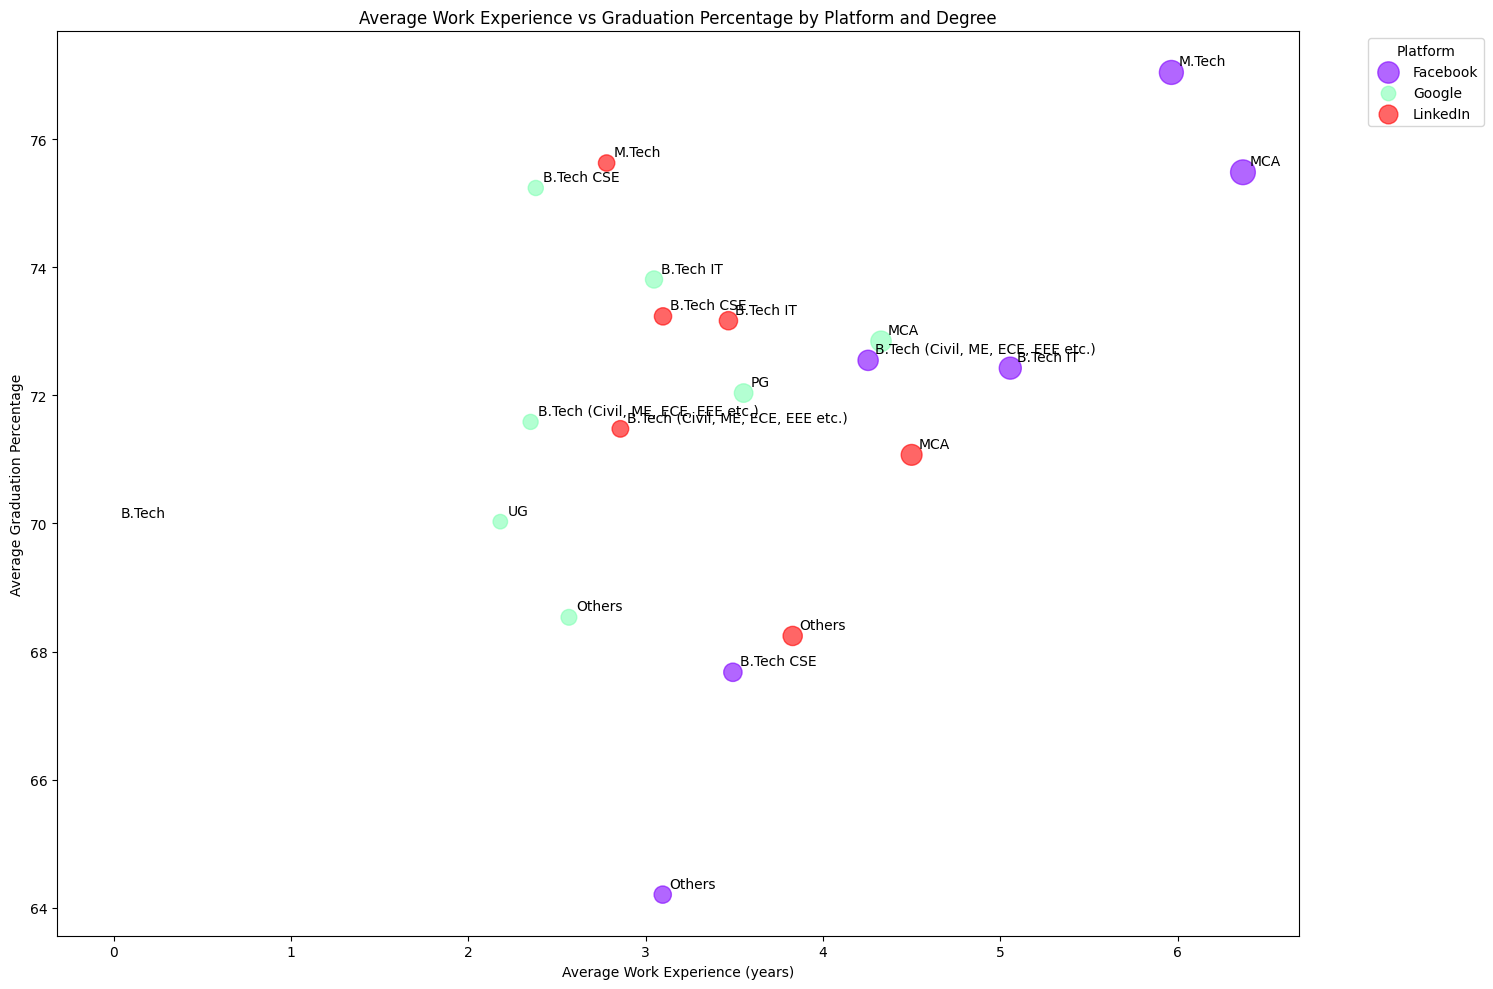

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel('Cleaned_Leads.xlsx')

cross_tab = pd.crosstab(df['platform'], df['graduation_degree'])

cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 10))
cross_tab_percentage.plot(kind='bar', stacked=True)
plt.title('Distribution of Graduation Degrees by Platform')
plt.xlabel('Platform')
plt.ylabel('Percentage')
plt.legend(title='Graduation Degree', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.close()




# Facebook seems to have a more diverse mix of degrees.
# Google appears to have a higher proportion of B.Tech CSE graduates.
# The "Others" category is present in varying proportions across platforms.

plt.figure(figsize=(15, 10))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Graduation Degrees by Platform')
plt.xlabel('Graduation Degree')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()
plt.close()

# Google has the highest number of B.Tech CSE graduates.
# Facebook has a significant number of leads across various degree categories.
# Some degree categories have very few or no leads for certain platforms.

avg_stats = df.groupby(['platform', 'graduation_degree']).agg({
    'work_experience': 'mean',
    'graduation_percentage': 'mean'
}).reset_index()

plt.figure(figsize=(15, 10))
platforms = avg_stats['platform'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(platforms)))

for platform, color in zip(platforms, colors):
    data = avg_stats[avg_stats['platform'] == platform]
    plt.scatter(data['work_experience'], data['graduation_percentage'], 
                s=data['work_experience']*50, c=[color], alpha=0.6, label=platform)
    
    for _, row in data.iterrows():
        plt.annotate(row['graduation_degree'], 
                     (row['work_experience'], row['graduation_percentage']),
                     xytext=(5, 5), textcoords='offset points')

plt.title('Average Work Experience vs Graduation Percentage by Platform and Degree')
plt.xlabel('Average Work Experience (years)')
plt.ylabel('Average Graduation Percentage')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.close()



In [32]:
print("Hello")

Hello


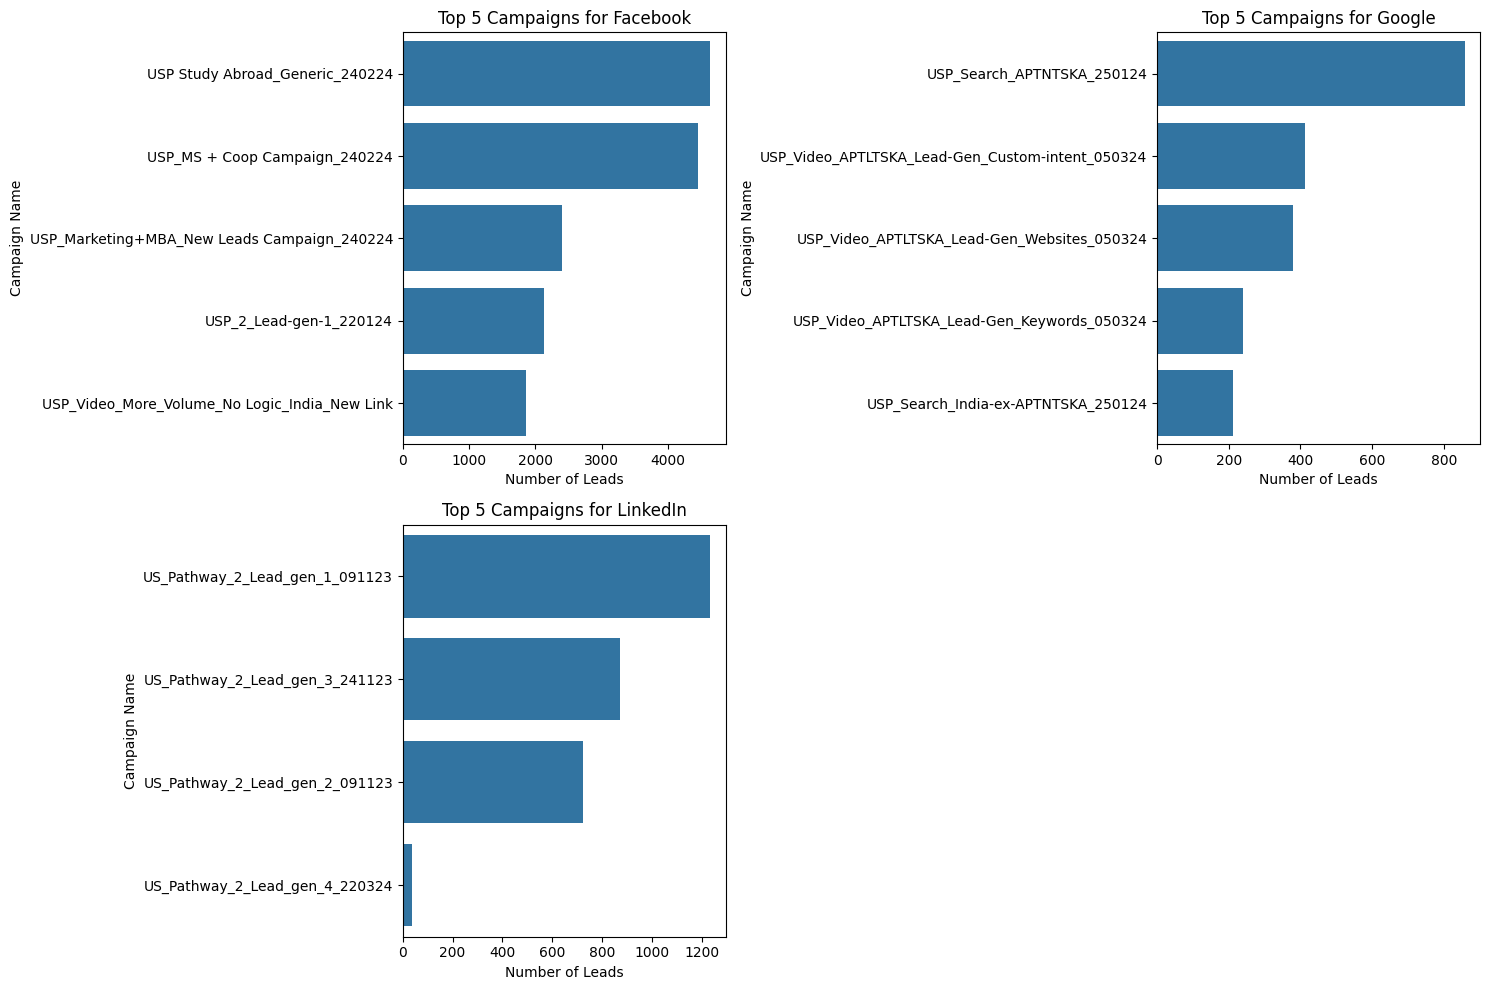

C:\Users\sudhe\AppData\Local\Temp\ipykernel_12244\84884519.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_campaigns = df.groupby(['Campaign Name', column]).size().unstack(fill_value=0)


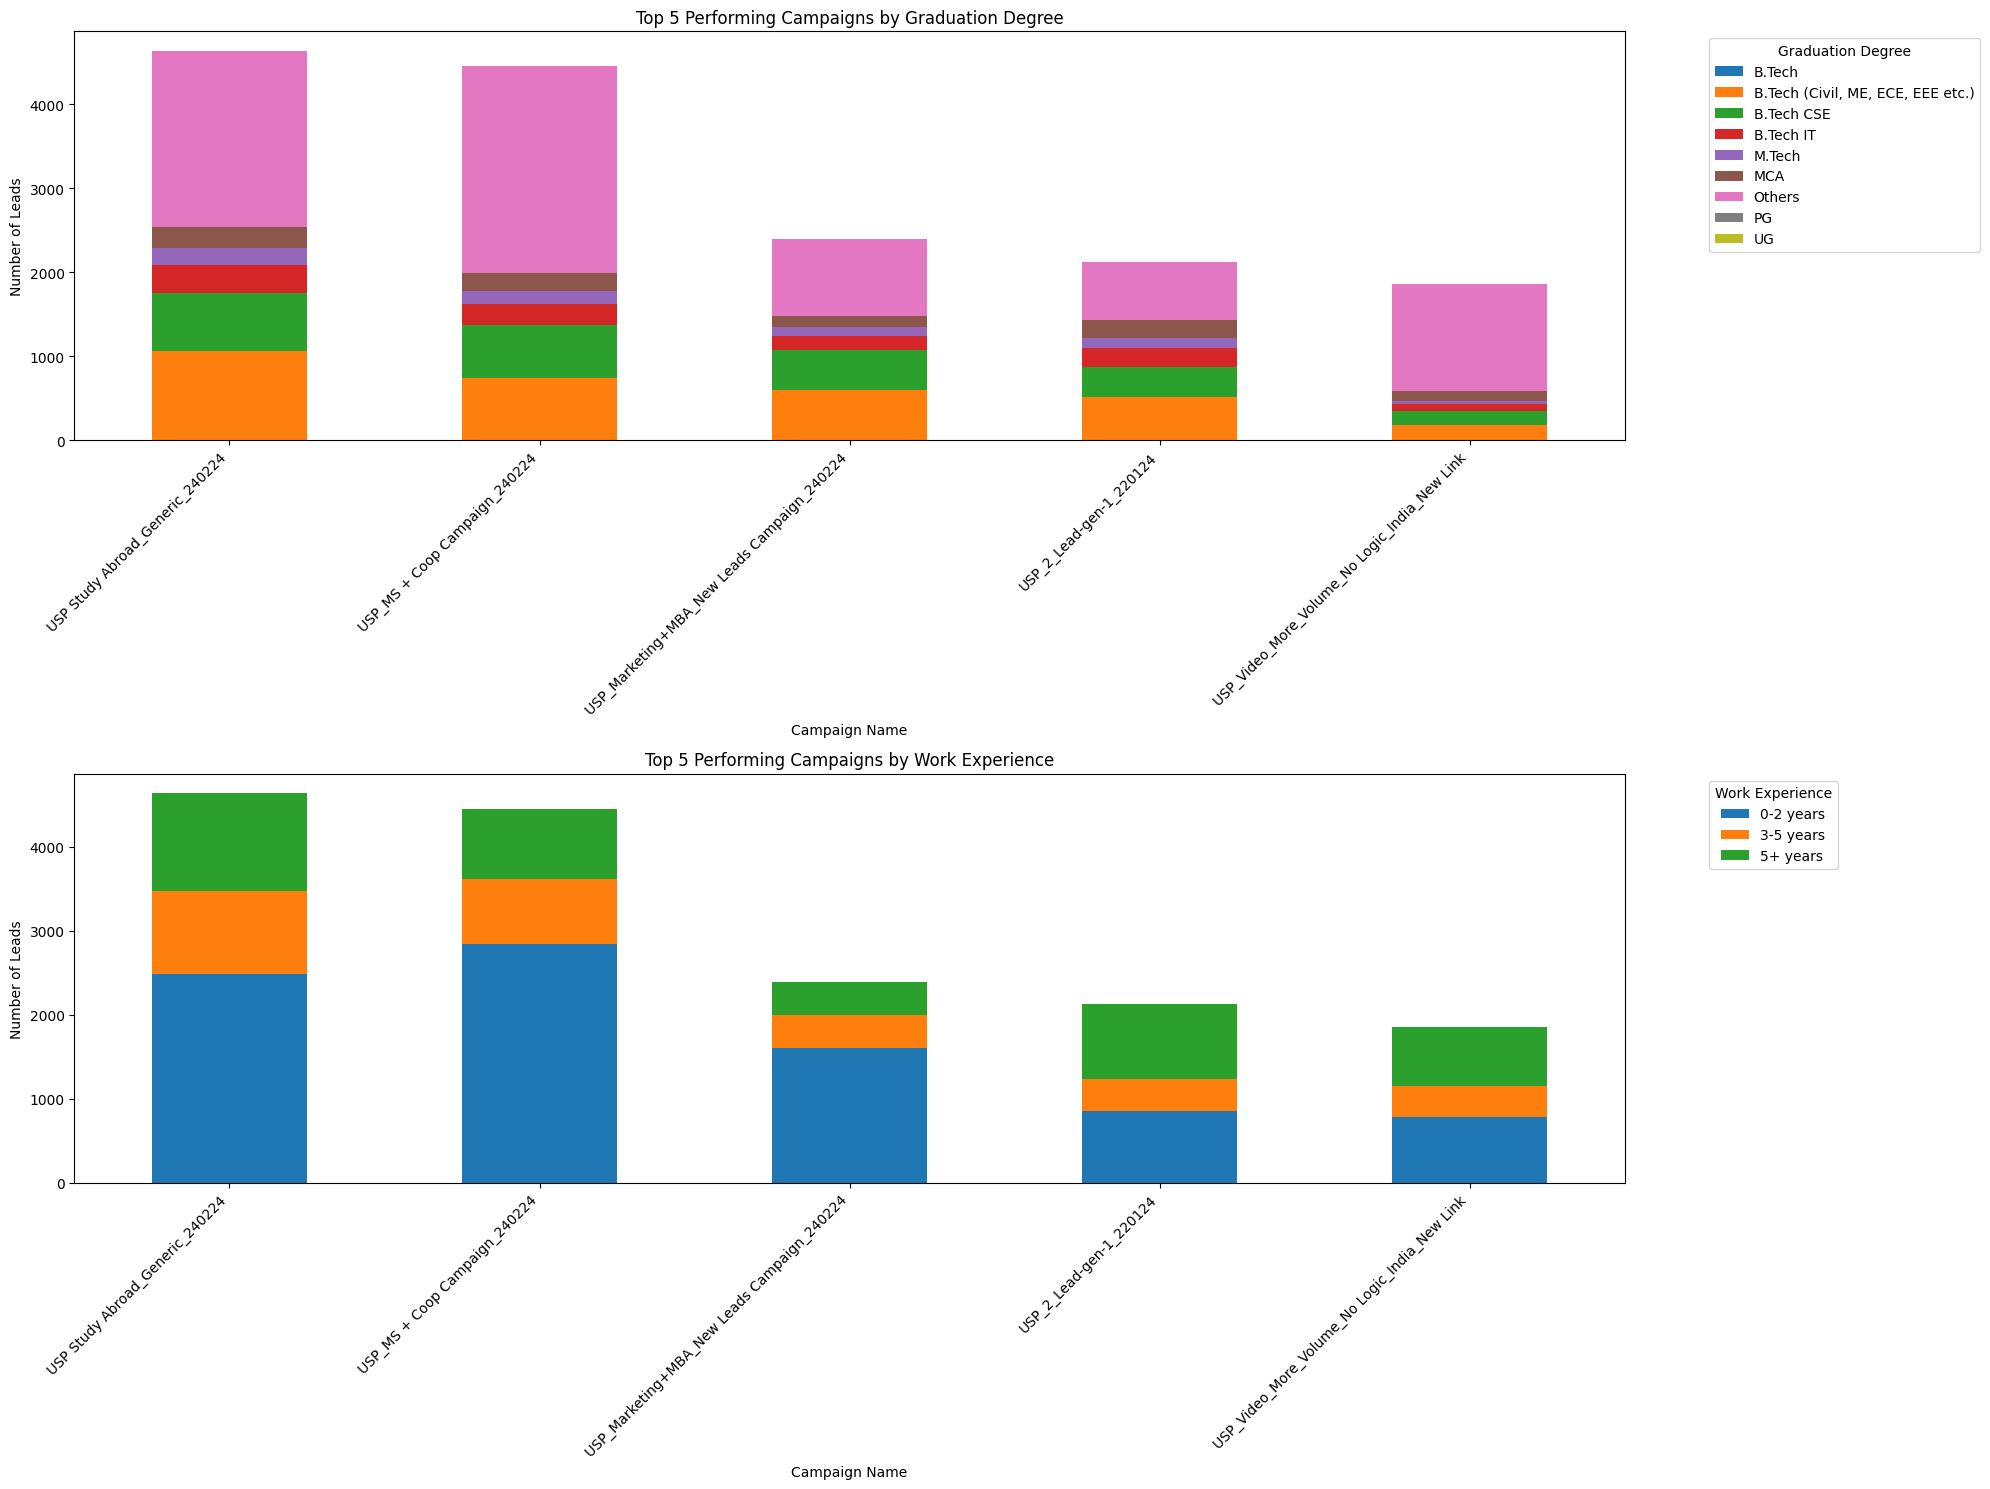

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Cleaned_Leads.xlsx')

plt.figure(figsize=(15, 10))
for i, platform in enumerate(df['platform'].unique()):
    platform_data = df[df['platform'] == platform]
    top_campaigns = platform_data['Campaign Name'].value_counts().nlargest(5)
    
    plt.subplot(2, 2, i+1)
    sns.barplot(x=top_campaigns.values, y=top_campaigns.index)
    plt.title(f'Top 5 Campaigns for {platform}')
    plt.xlabel('Number of Leads')
    plt.ylabel('Campaign Name')

plt.tight_layout()
plt.show()
plt.close()




# Facebook:

# The top campaign is "USP_2_Lead-gen-1_220124", which significantly outperforms the others.
# There's a mix of different campaign types, including some focused on specific locations (e.g., "USP_Bangalore_Lead-gen_220124").
# Google:

# "USP_Search_APTNTSKA_250124" is the top-performing campaign, with a substantial lead over others.
# Search and video campaigns seem to be prominent in the top 5.
# Instagram:

# The top campaign is "USP_2_Lead-gen-1_220124", similar to Facebook.
# There's less variation in the performance of the top 5 campaigns compared to other platforms.
# LinkedIn:

# "USP_2_Lead-gen-1_220124" is also the top campaign here.
# The performance difference between the top campaigns is less pronounced compared to other platforms.


df['experience_category'] = pd.cut(df['work_experience'], 
                                   bins=[-float('inf'), 2, 5, float('inf')], 
                                   labels=['0-2 years', '3-5 years', '5+ years'])

plt.figure(figsize=(20, 15))
for i, (column, title) in enumerate([('graduation_degree', 'Graduation Degree'), 
                                     ('experience_category', 'Work Experience')]):
    top_campaigns = df.groupby(['Campaign Name', column]).size().unstack(fill_value=0)
    top_campaigns_total = top_campaigns.sum(axis=1).nlargest(5).index
    top_campaigns_data = top_campaigns.loc[top_campaigns_total]
    
    plt.subplot(2, 1, i+1)
    top_campaigns_data.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Top 5 Performing Campaigns by {title}')
    plt.xlabel('Campaign Name')
    plt.ylabel('Number of Leads')
    plt.legend(title=title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
plt.close()




# Graduation Degree:

# The campaign "USP_2_Lead-gen-1_220124" is the top performer across all degree types.
# B.Tech CSE graduates form a significant portion of leads across all top campaigns.
# There's a noticeable presence of "Others" and "PG" degree holders in most campaigns.
# Some campaigns seem to attract a more diverse mix of degree holders than others.
# Work Experience:

# The same campaign "USP_2_Lead-gen-1_220124" leads in terms of work experience categories as well.
# The "0-2 years" experience category forms the largest group across all top campaigns.
# There's a good representation of "3-5 years" and "5+ years" experience categories in most campaigns.
# Some campaigns appear to be more effective in attracting experienced professionals (5+ years) than others.
# Overall, these visualizations provide valuable insights:

# The campaign "USP_2_Lead-gen-1_220124" is consistently top-performing across platforms and lead characteristics.
# Different platforms have varying levels of campaign performance diversity.
# There are noticeable patterns in the types of leads (in terms of education and experience) attracted by different campaigns.

